<a href="https://colab.research.google.com/github/rockey1006/Variational-Autoencoders/blob/master/Facenet_VAE_1000_6_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Install necessary packages**

In [2]:
!git clone https://github.com/rockey1006/facenet.git
!pip uninstall tensorflow
!pip install tensorflow==1.13.2
!pip install scipy==1.2.1
!pip install facenet

Cloning into 'facenet'...
remote: Enumerating objects: 3154, done.
remote: Total 3154 (delta 0), reused 0 (delta 0), pack-reused 3154
Receiving objects: 100% (3154/3154), 2.94 MiB | 2.30 MiB/s, done.
Resolving deltas: 100% (2234/2234), done.
Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 92.6MB 46kB/s 
     |████████████████████████████████| 368kB 36.9MB/s 
     |████████████████████████████████| 3.2MB 41.0MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfu

# **Datasets**

In [3]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/align.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/celeba')

# **Pretrained perceptual model for step 1 trainning**

In [4]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/20170512-110547.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/facenet/model')

# **1. Train a Variational Autoencoder**

In [9]:
!python facenet/src/generative/train_vae.py \
facenet.src.generative.models.dfc_vae \
/content/celeba/align \
facenet.src.models.inception_resnet_v1 \
/content/facenet/model/20170512-110547/model-20170512-110547.ckpt-250000 \
--models_base_dir ~/vae/ \
--reconstruction_loss_type PERCEPTUAL \
--loss_features 'Conv2d_1a_3x3,Conv2d_2a_3x3,Conv2d_2b_3x3' \
--max_nrof_steps 10 \
--batch_size 128 \
--latent_var_size 100 \
--initial_learning_rate 0.0002 \
--alfa 1.0 \
--beta 0.5
#Modify dfc_vae.py :import facenet.src.generative.models.vae_base
#Modify train_vae.py  1.by import facenet.src.facenet as facenet

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## **2. Calculate attribute vectors**

In [42]:
!python facenet/src/generative/calculate_attribute_vectors.py \
facenet.src.generative.models.dfc_vae \
~/vae/20200622-161624/model.ckpt-10 \
/content/celeba/align/1000/ \
--annotations_filename /list.txt \
--output_filename attribute.h5 \
--batch_size 128 \
--image_size 160 \
--latent_var_size 100
#Modify calculate_attribute_vectors.py :'--annotations_filename'+'--output_filename'
#import facenet.src.facenet as facenet
#img_attribs = list(map(int, line[1:]))
# index_list =  list(range(len(image_list)))
#fields = [n.encode("ascii", "ignore") for n in fields]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Details of the attribute vectors 

In [44]:
import h5py
f = h5py.File('/content/attribute.h5' , 'r')
f.keys()
print([key for key in f.keys()])

['attribute_vectors', 'attributes', 'fields', 'latent_vars']


In [45]:
print(f['attribute_vectors'][0])
print(f['attribute_vectors'][0].shape)
print(f['attribute_vectors'][:].shape)#the attribute vectors of the first picture,which conclude 40 different attributes

[ 1.37736455e-01  7.03407943e-01  3.83071828e+00 -1.44719803e+00
 -6.16876543e-01  6.53207958e-01  3.58562678e-01 -6.44664645e-01
 -1.82338104e-01  2.26976490e+01 -4.37775660e+00  3.21807623e+00
 -2.87773252e-01  4.97629076e-01 -7.37374067e-01  1.28140485e+00
  1.72204012e-03 -3.57810259e-01 -2.84980685e-01 -1.41055334e+00
  1.55582111e-02  2.28556916e-01  5.61137974e-01  2.22453460e-01
  3.22997689e+00 -1.84329760e+00 -1.17740326e-01 -1.33709645e+00
 -1.58517003e-01  3.35434496e-01 -1.37298122e-01  3.47072572e-01
 -5.15817106e-01  5.69147058e-02  1.39201832e+00  7.90915012e-01
  4.63575214e-01 -5.59448183e-01 -1.22080874e+00 -1.14961042e+01
  1.60432801e-01 -1.82960495e-01 -3.59254070e-02 -1.46420255e-01
 -2.37842575e-01  1.88470066e-01 -1.62146479e-01  3.78055908e-02
  2.03255802e-01 -7.92203426e-01 -1.33432662e+00 -8.42705250e+00
 -1.37251544e+00 -2.22238026e+01 -8.29793036e-01 -8.43573928e-01
  1.79028488e+02 -1.03074062e+00 -1.20785356e+00  4.69078273e-01
 -8.12994361e-01  9.23308

In [46]:
print(f['attributes'][0])
print(f['attributes'][0].shape)
print(f['attributes'][:].shape)
#the attribute signs of the first picture,which conclude 40 different attributes.true?1:-1

[-1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
  1. -1. -1.  1.]
(40,)
(998, 40)


In [47]:
print(f['fields'][:].shape)
print(f['fields'][0])
print(f['fields'][0].shape)

(40,)
b'5_o_Clock_Shadow'
()


In [48]:
print(f['latent_vars'][0])
print(f['latent_vars'][0].shape)
print(f['latent_vars'][:].shape)

[  1.09709859   3.61044955 -14.85653019   3.33949304   3.91104245
  -0.37046629  -3.6608603    1.96662605  -5.68190861  10.39366913
  -5.71844482  11.1111269    4.10572958  10.42956829  -4.07480335
 -10.82503891  12.78894234  -0.12640037   3.76783061   0.74803531
  -1.15483713   0.4774586   -5.7041316    3.19794941  -9.65425682
  -5.00644112   5.79767036  -1.83828115   1.06832623  -6.93963718
   7.0563426    9.4483099   -4.67690039  -6.73988485   1.08505893
  -0.29706201  -9.43916321  -3.25419164  -2.28615379   0.32720792
   8.80851078   3.11698198  -4.61042976   6.66717196 -12.37562084
  -5.19787121   6.38331795   4.69187784  -3.71437073   0.69862282
   1.34868157   1.80594957  -9.74541378  20.19051933  -3.78015804
   4.27400875  -4.55877447  -0.16349161  -0.16399622  -3.80957985
  -1.51149297 -11.76733875   0.06824084  -1.09659243   0.45518237
   1.45928204   0.73919135   3.21727419  -6.41634989  -5.09596968
   9.20545673  10.73610401  -2.05252886   3.82981372  -3.09614968
  -4.27214

# **3. Add smile to a face**

In [50]:
!python facenet/src/generative/modify_attribute.py \
facenet.src.generative.models.dfc_vae \
~/vae/20200622-161624/model.ckpt-10 \
/content/attribute.h5 \
/content/facenet/add.png
#Modify attributes.py  by import facenet.src.facenet as facenet

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

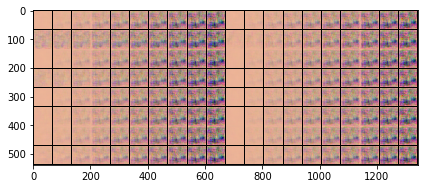

In [51]:
from skimage import data, io

img = io.imread("/content/facenet/add.png")
io.imshow(img)

io.show()